# Setup and Data Preparation

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
df = pd.read_csv('concrete_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
# Find duplicates
df.duplicated().sum()

np.int64(25)

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Distribution of variables
- Visualize the distribution of each variable using histograms.

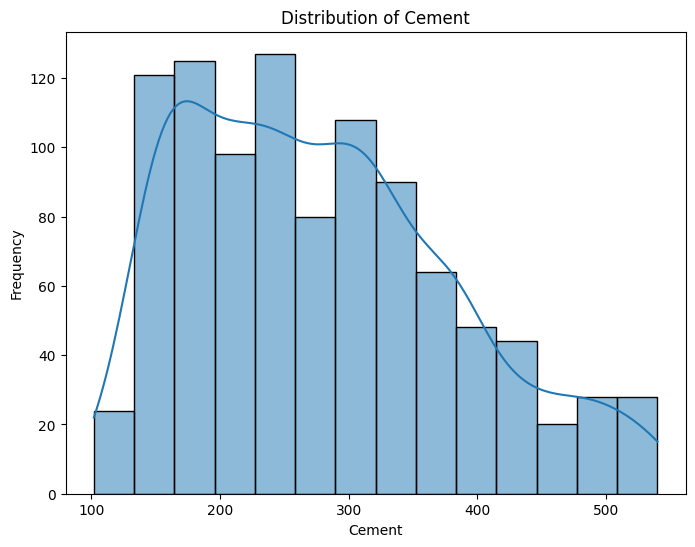

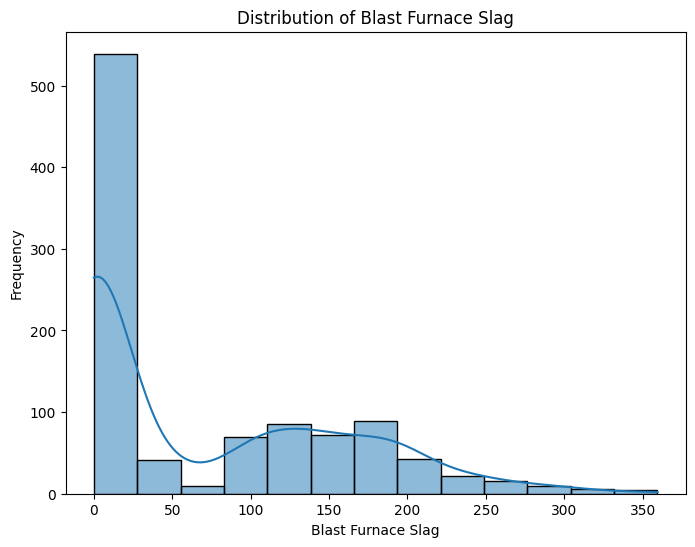

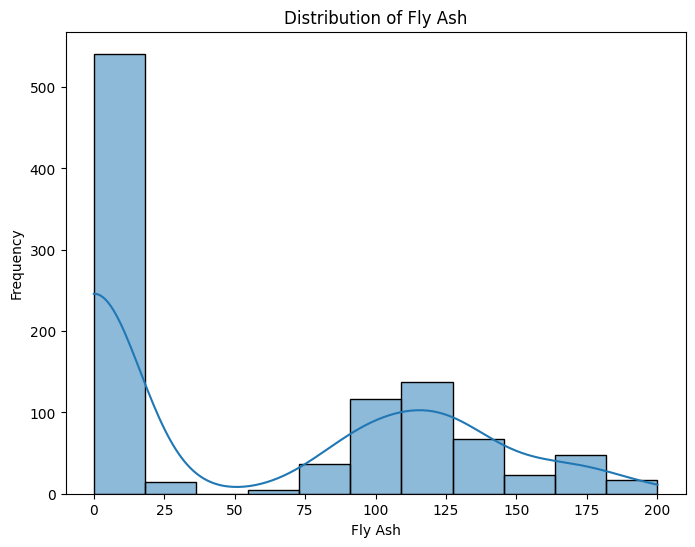

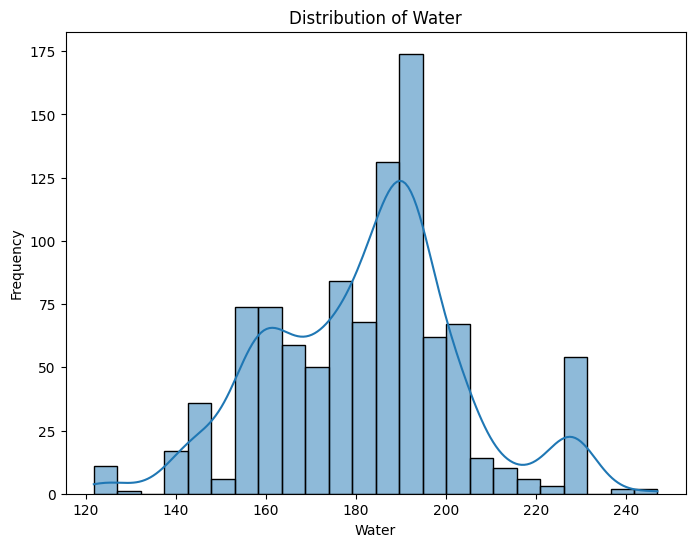

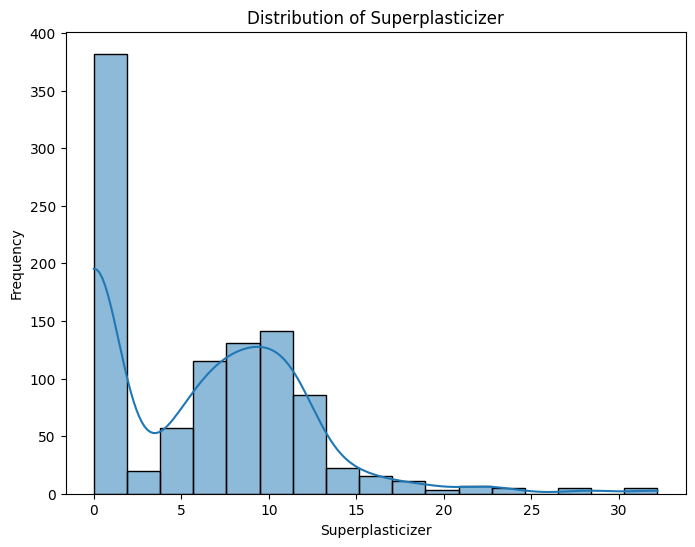

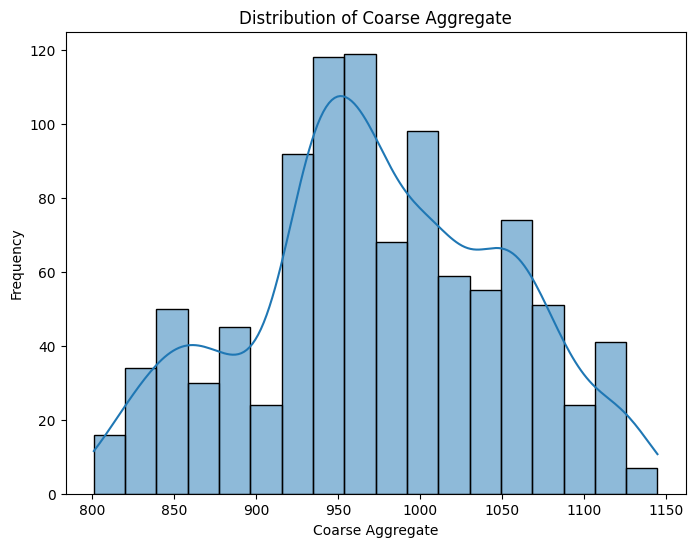

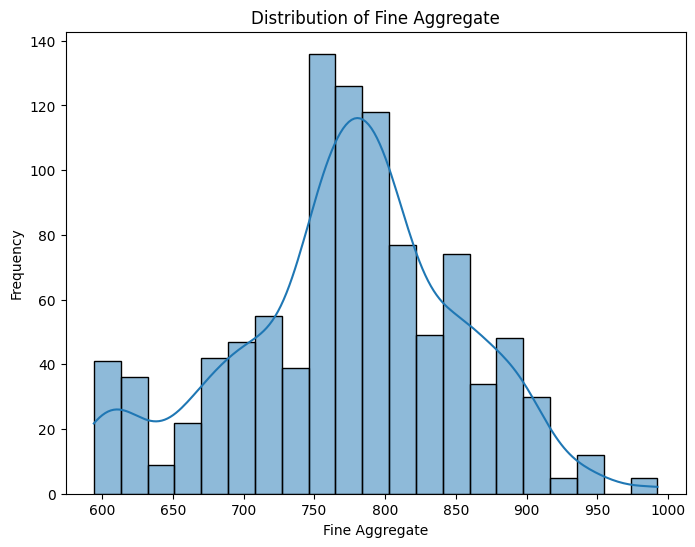

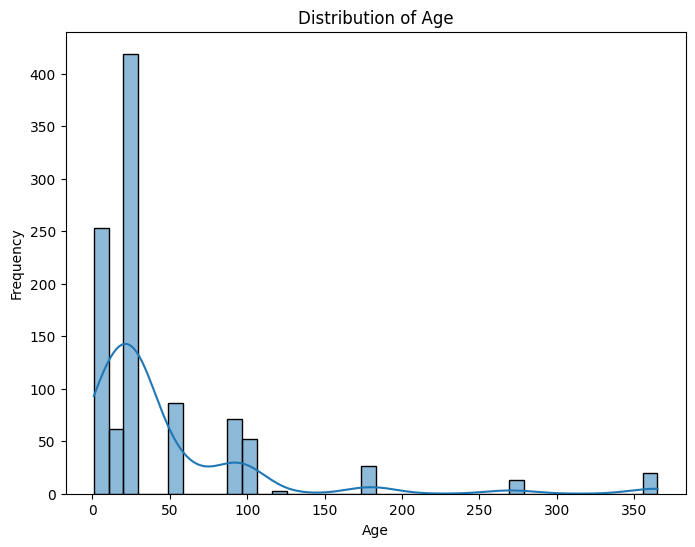

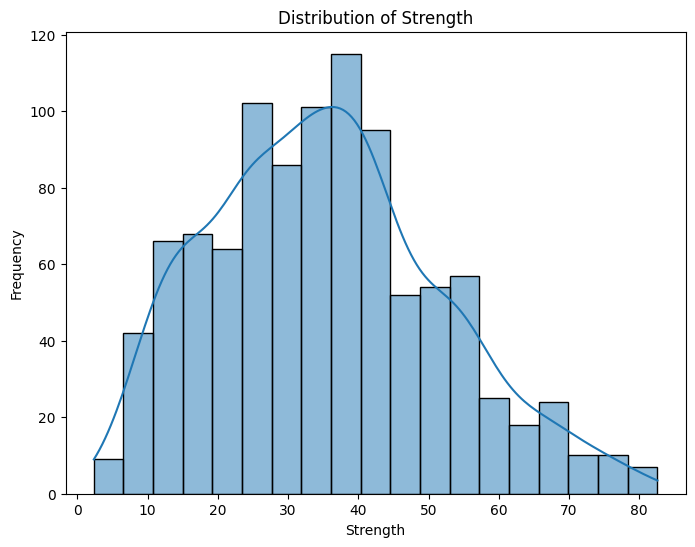

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Pairplot
- Generate a pairplot to visualize the relationships between all pairs of variables.

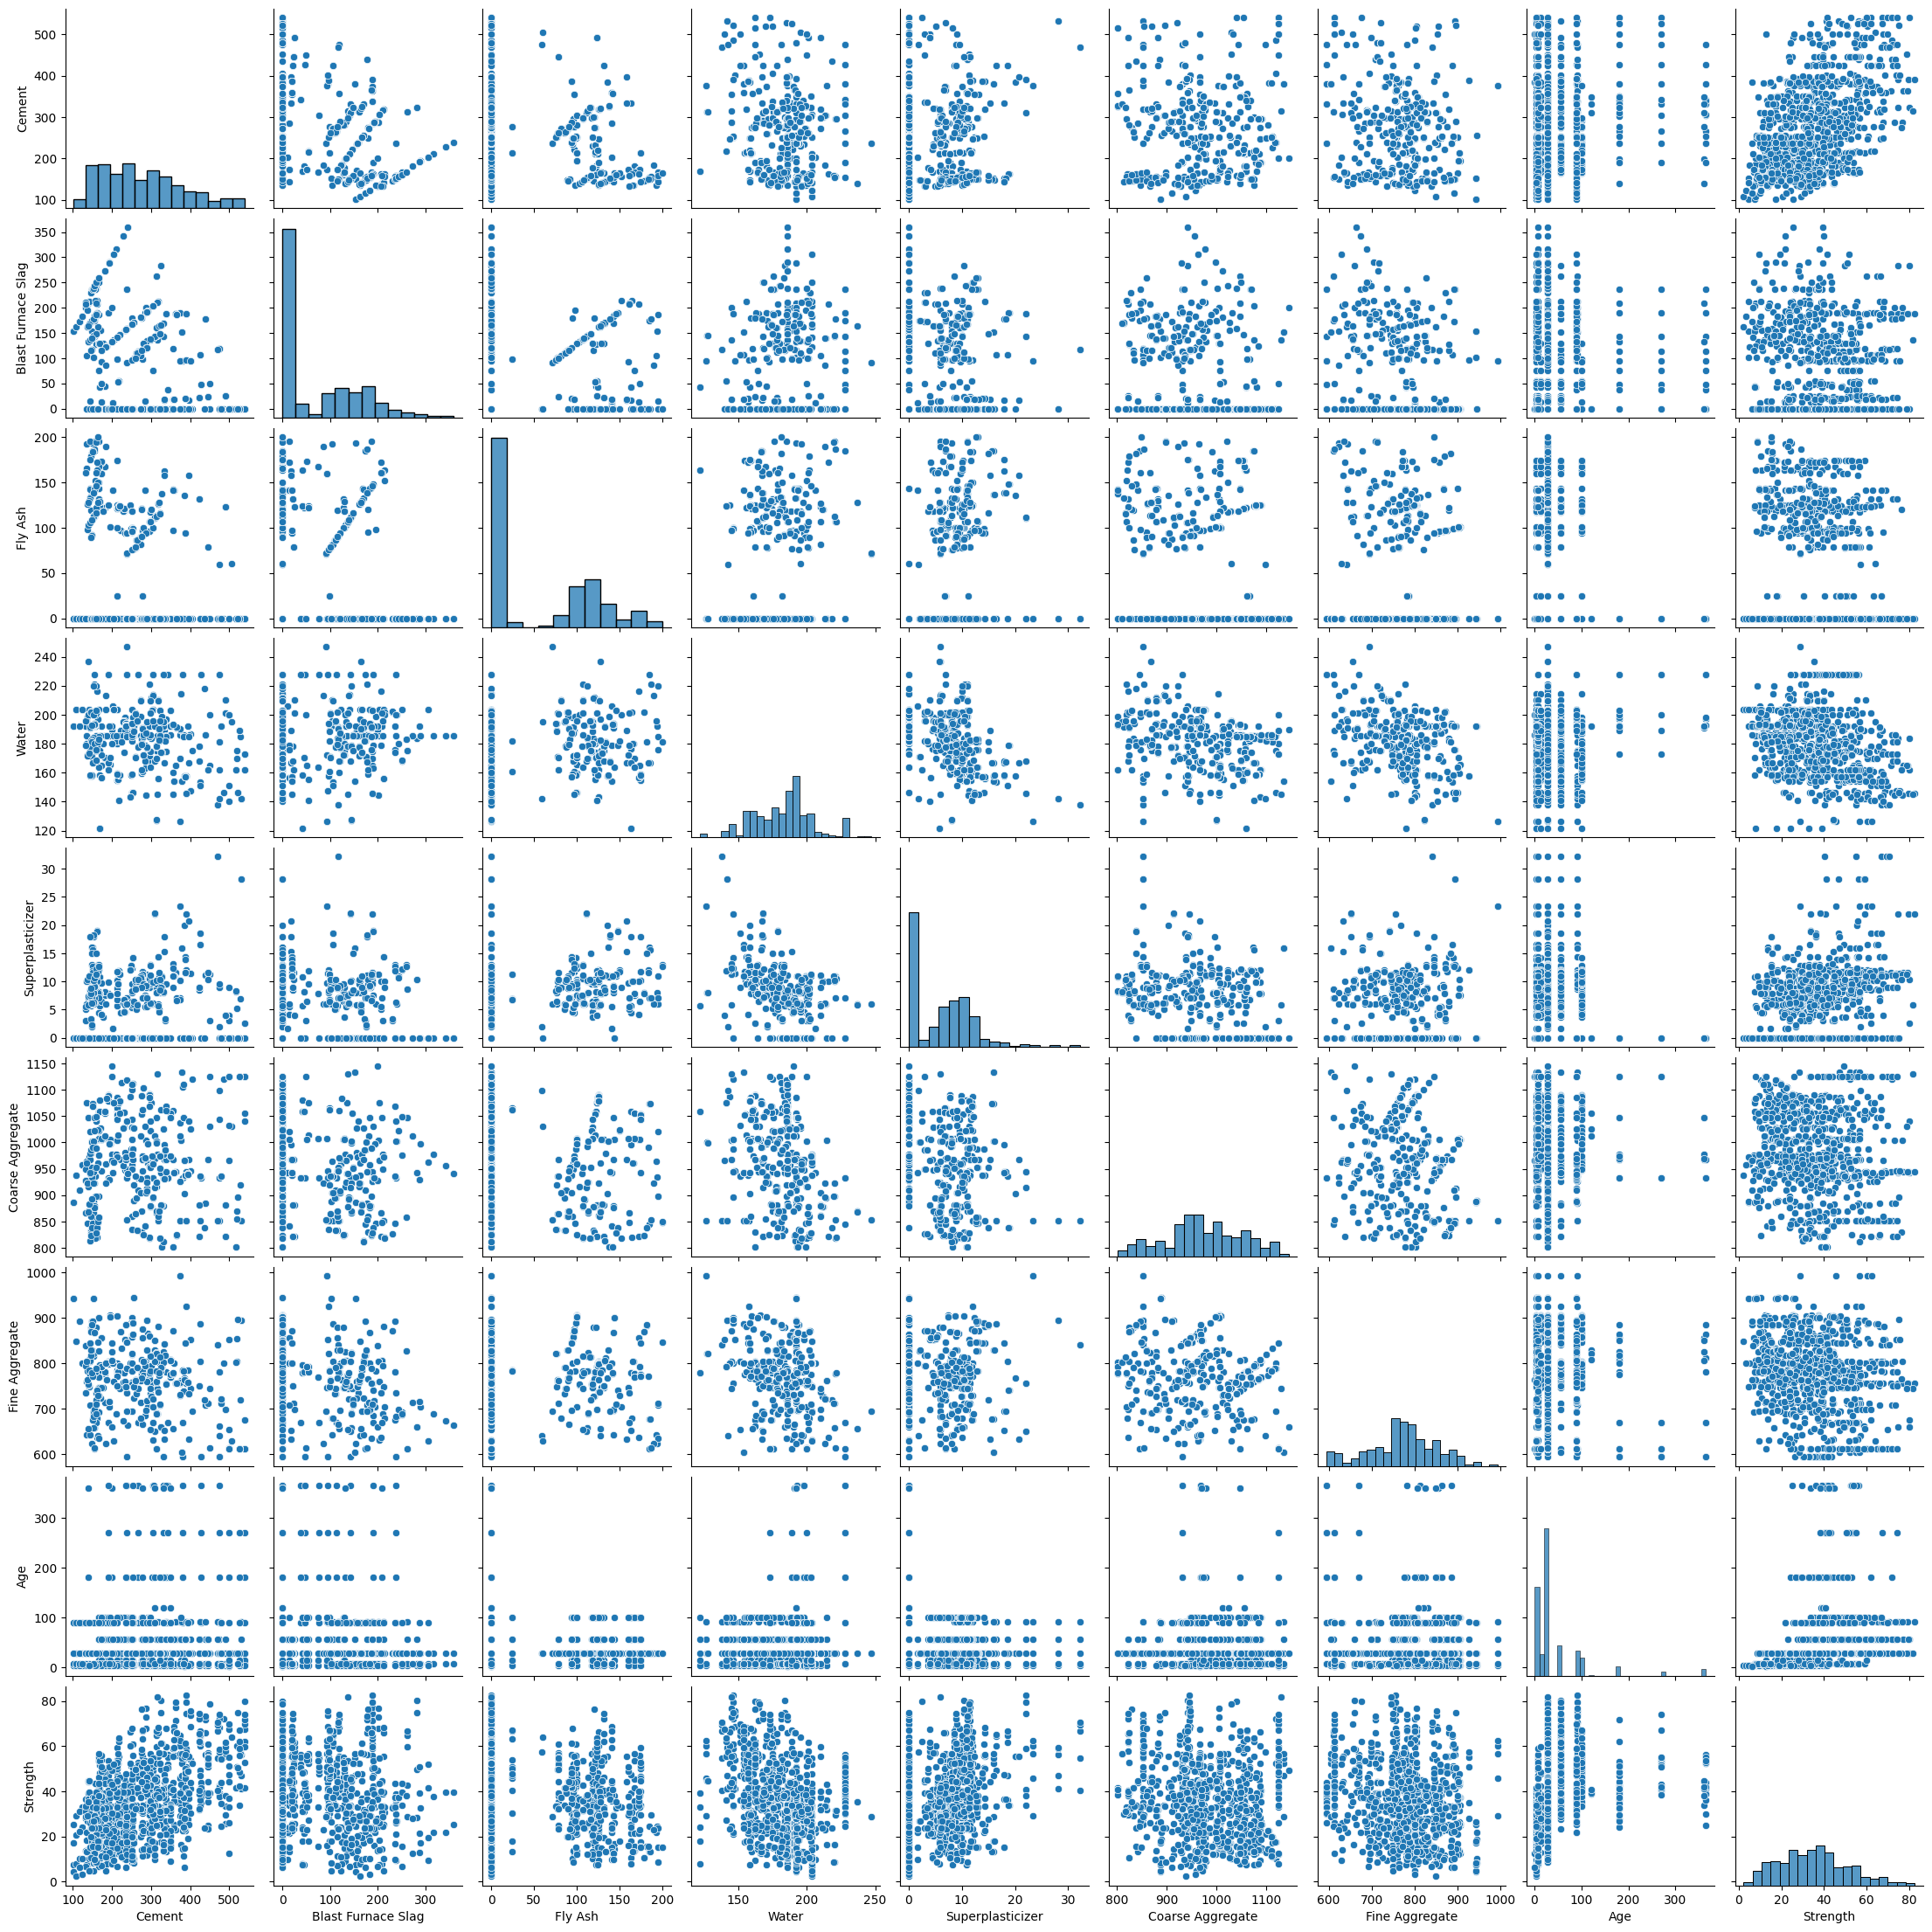

In [ ]:
sns.pairplot(df)
plt.show()

## Correlation Matrix

- Idenitfying correlation between each features using Pearson method.

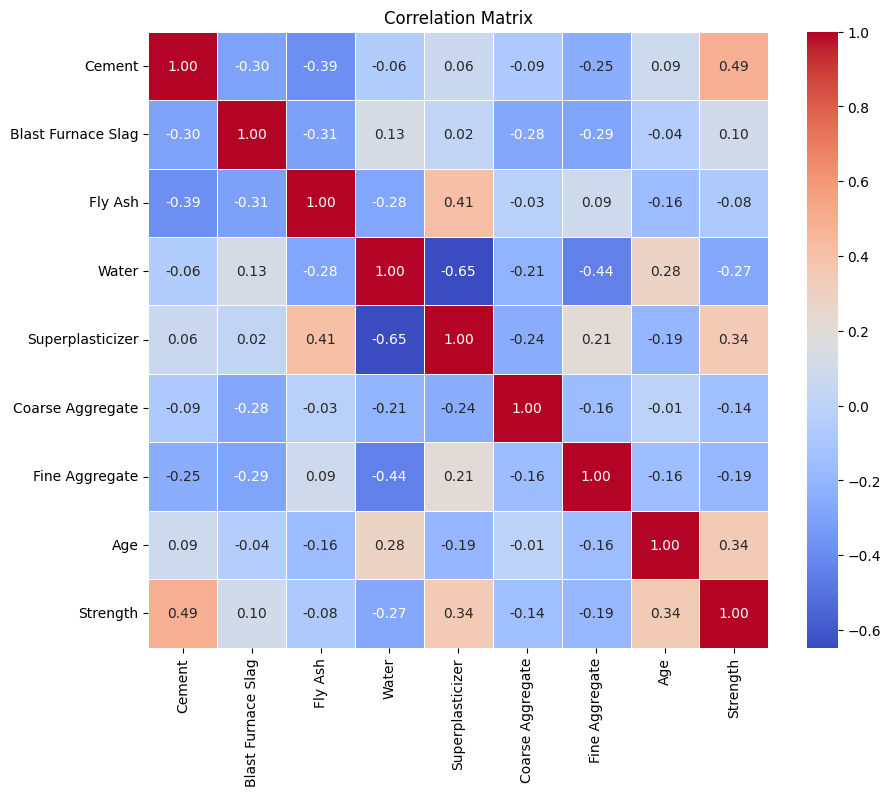

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

## Box plots

- Create box plots to visualize the distribution of each variable and identify potential outliers.

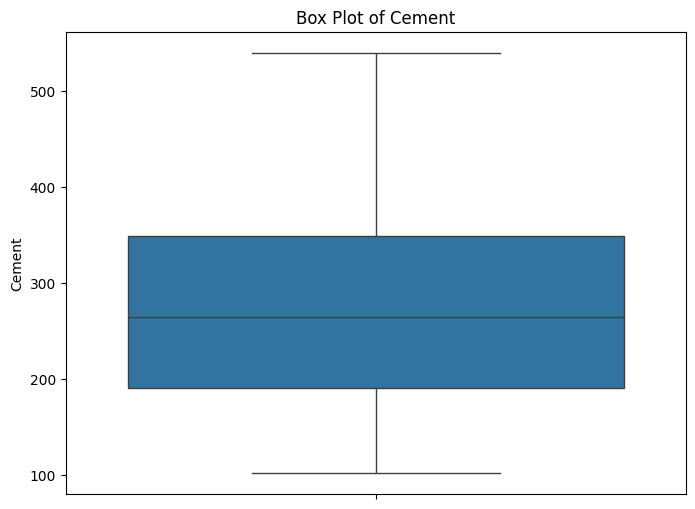

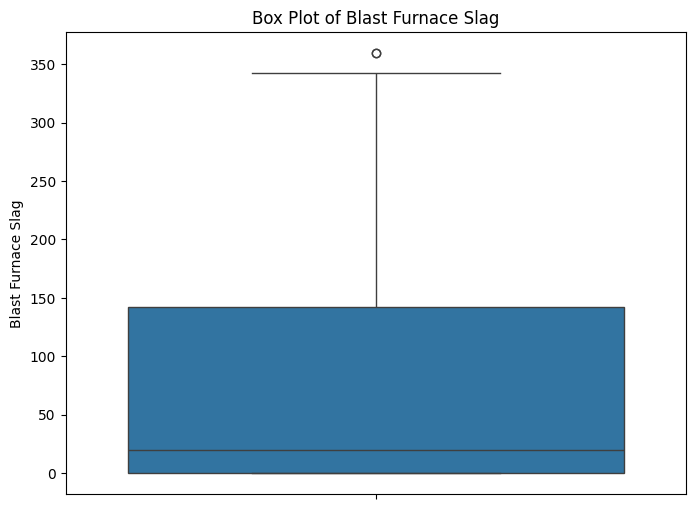

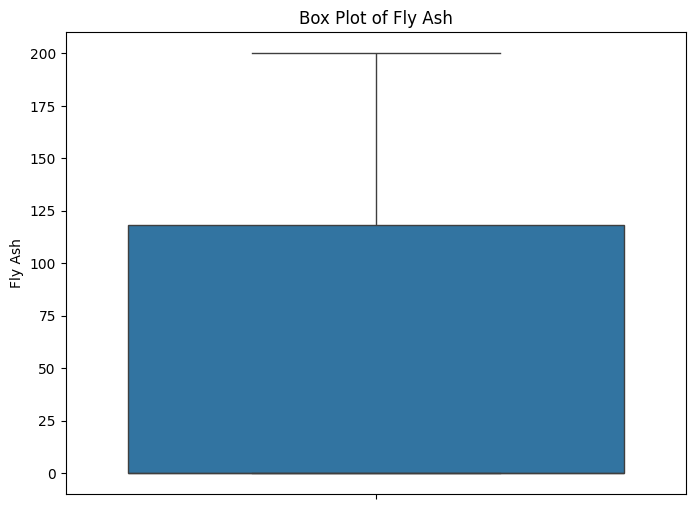

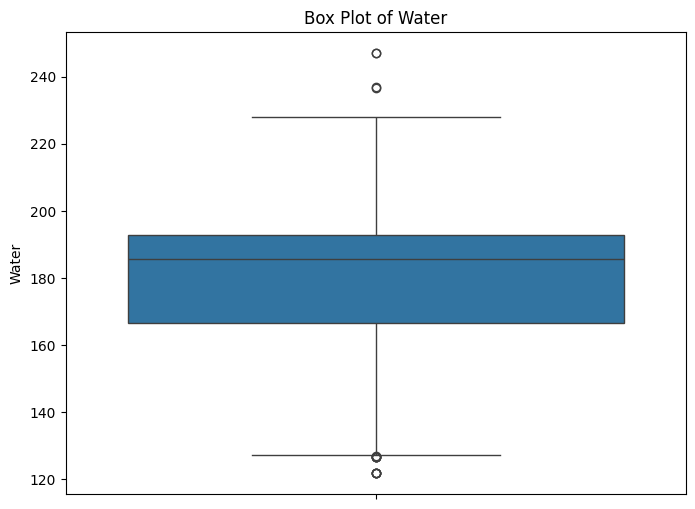

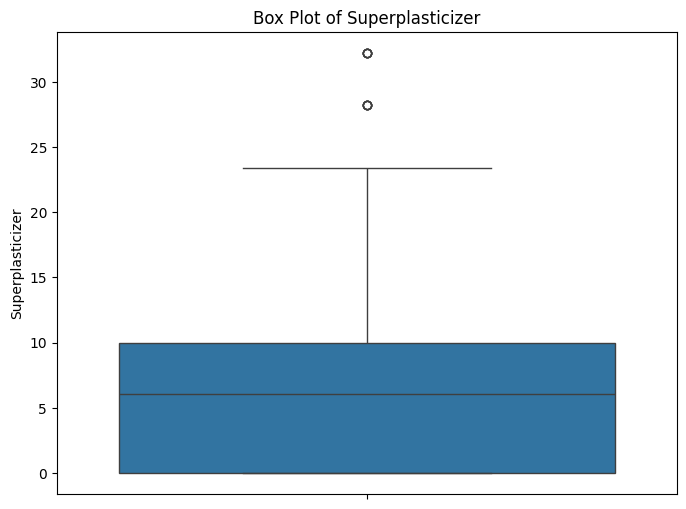

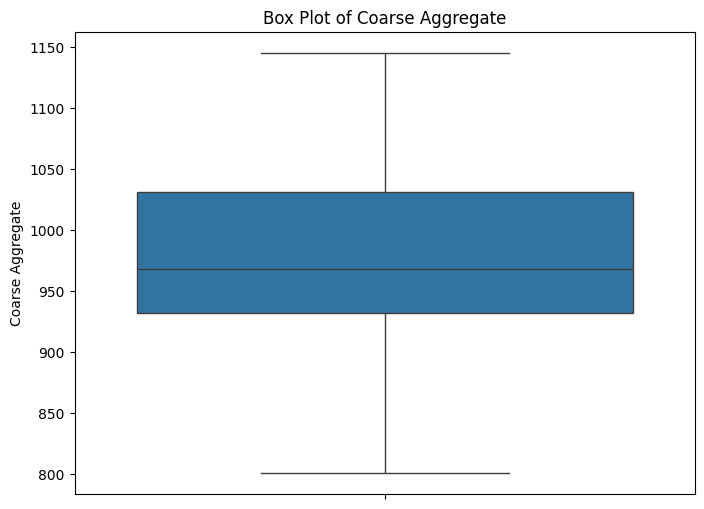

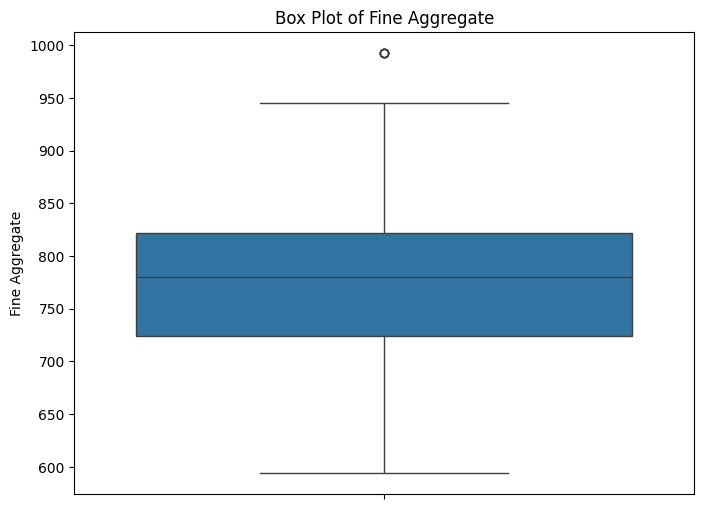

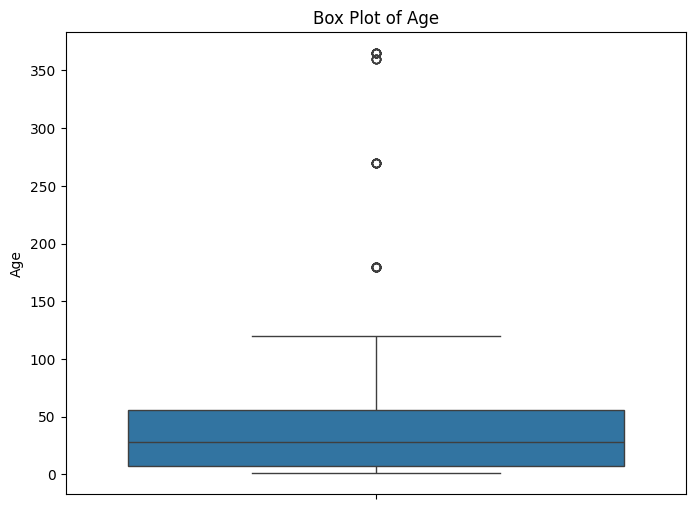

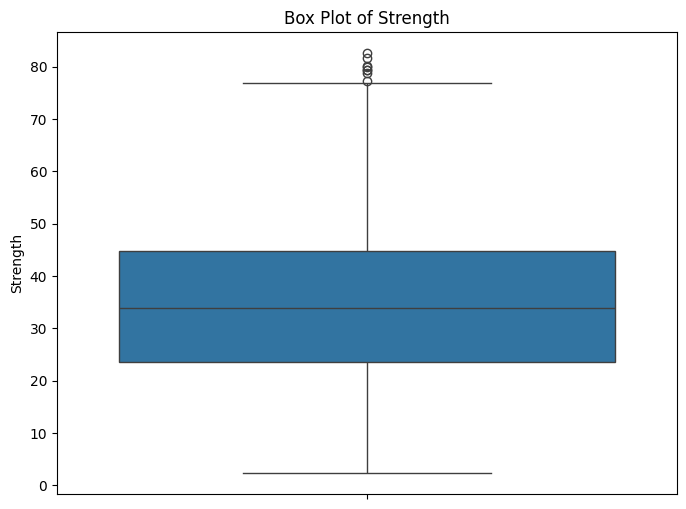

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.show()

# Simple Linear Regression

## Split the data:

- Split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Age']]
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the model

- Train a simple linear regression model on the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

- Evaluate the performance of the trained model on the testing data.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 271.32
R-squared: 0.09


## Simple linear regression with different variable

- Feature: Cement
- Target: Strength

In [ ]:
from sklearn.model_selection import train_test_split

X = df[['Cement']]
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 236.48
R-squared: 0.21


In [ ]:
model.coef_ , model.intercept_

(array([0.0765921]), np.float64(13.760237162324671))

In [ ]:
model.coef_

array([0.0765921])

## Visualize the results

- Visualize the regression line and the data points.

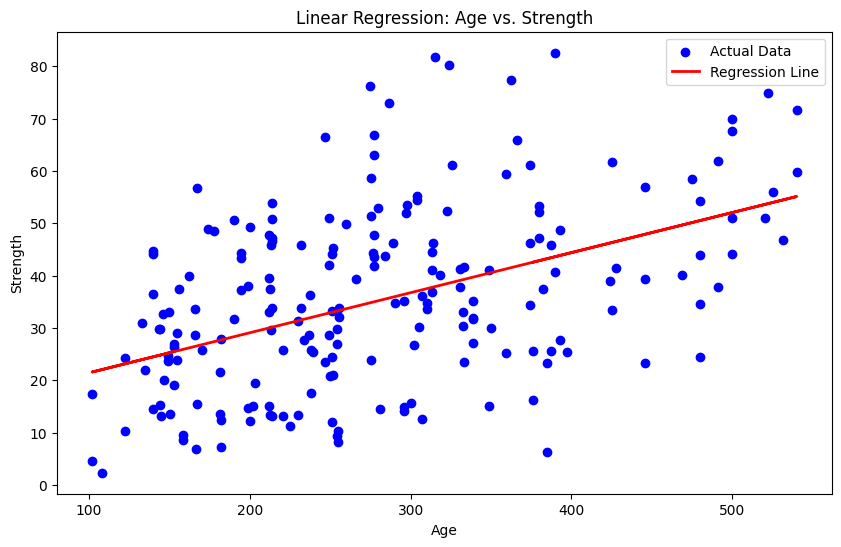

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Age vs. Strength')
plt.xlabel('Age')
plt.ylabel('Strength')
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

* The mean squared error (MSE) of the model on the test set is 271.32.
* The R-squared score of the model on the test set is 0.09, indicating that the model explains only about 9% of the variance in Strength based on Age.

### Insights or Next Steps

* The low R-squared score suggests that Age is not a strong predictor of Strength, or that a simple linear model is not appropriate for this relationship. Consider exploring other features or non-linear models.
* Further analysis could involve examining the residuals to check for patterns and potential violations of linear regression assumptions.

# Multiple Linear Regression

## Prepare the data

- Select features and target variable, and split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Strength', axis=1)
y = df['Strength']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scaling the values
from sklearn.preprocessing import StandardScaler

# Fit the scaler with feature names
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Train the model

- Train a multiple linear regression model on the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_ , model.intercept_

(array([12.11876104,  8.43727247,  5.43950487, -2.82785409,  1.97079329,
         1.19898283,  1.66994542,  6.89450368]),
 np.float64(35.0669776119403))

## Evaluate the model

- Evaluate the performance of the trained model on the testing data using appropriate metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 125.25
R-squared: 0.58


In [ ]:
model.coef_ , model.intercept_

(array([12.11876104,  8.43727247,  5.43950487, -2.82785409,  1.97079329,
         1.19898283,  1.66994542,  6.89450368]),
 np.float64(35.0669776119403))

## Interpret the coefficients

- Interpret the coefficients of the trained model to understand the relationship between the features and the target variable.

In [ ]:
print(f"Intercept: {model.intercept_:.2f}")

print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

Intercept: 35.07
Coefficients:
Cement: 12.12
Blast Furnace Slag: 8.44
Fly Ash: 5.44
Water: -2.83
Superplasticizer: 1.97
Coarse Aggregate: 1.20
Fine Aggregate: 1.67
Age: 6.89


# Residual Analysis

## Calculate residuals

- Calculate the residuals (the difference between the actual and predicted values) for the test set.

In [ ]:
residuals = y_test - y_pred

## Visualize residuals

- Create a scatter plot of the residuals against the predicted values to check for patterns.

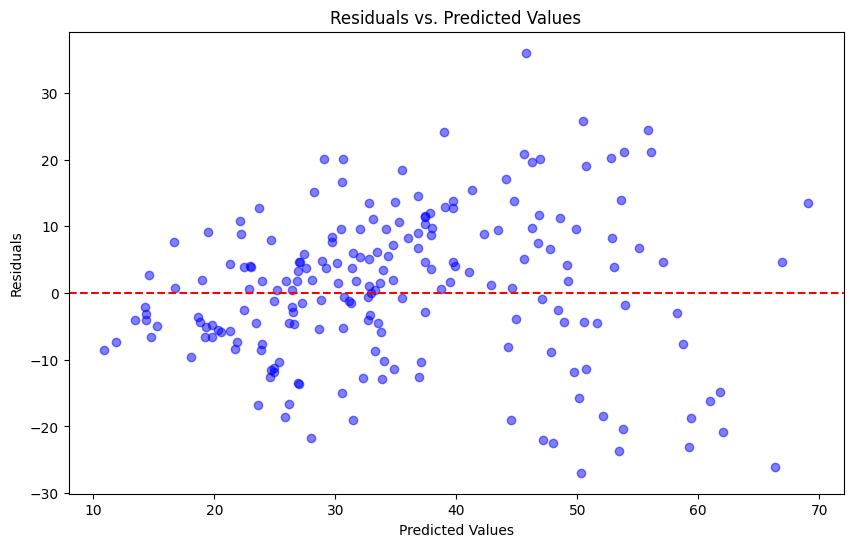

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Check for normality

- Create a histogram or a Q-Q plot of the residuals to check for normality.

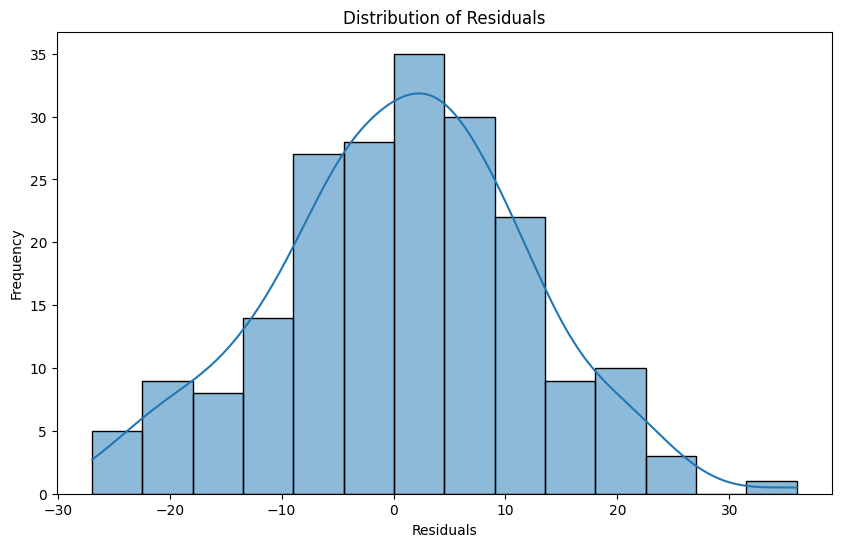

<Figure size 800x600 with 0 Axes>

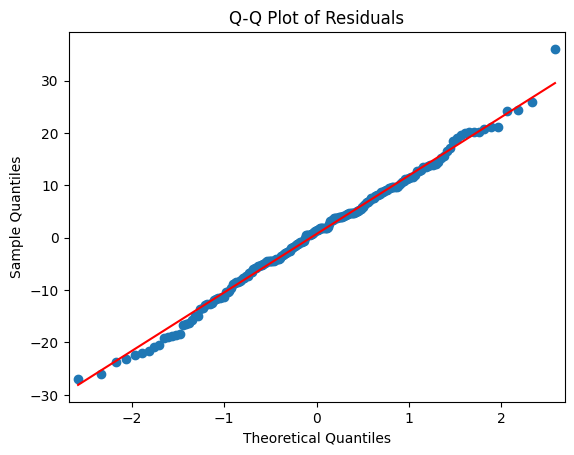

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Summary of Residual Analysis

*   The scatter plot of residuals vs. predicted values shows no clear pattern, which is a good indication that the linear model assumptions are not severely violated. The residuals appear to be randomly scattered around zero.
*   The histogram and Q-Q plot of the residuals suggest that the residuals are approximately normally distributed, though there might be some slight deviations at the tails. This generally supports the assumptions of linear regression.